<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

To copy the notebook, go to File and click create "Save a copy to ..." and work on that copy.

Please submit a pdf of the page of your notebook (Ctrl + p on the page, save as pdf, and submit that pdf) on gradescope.

Please remember to assign pages to the appropriate questions. Not doing so will result in the deduction of points. Please submit a **pdf** version of the colab notebook.

# **Homework 2: Python Warmup and Regression**

## Question 0 Part (a)
Do you have confusions or questions about the previous lectures?  (This is optional to answer)

I don't have any confusion.

## Question 0 Part (b)
Any suggestions or thoughts about the course? (This is optional to answer)

The class has been pretty so far

In [7]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import copy
import pandas as pd

# Part 1: Using Python to Solve Problems
The first two questions in part 1 come from [projecteuler.net](https://projecteuler.net/archives). Project Euler is a site that has an archive of interesting mathematical/computational problems to try to solve.

The last problem was modeled after a problem found on leetcode.com. Leetcode is a great resource to get problems that allow you to hone your programming skills.

## (5 pts) Question 1: Multiples of 3 or 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Finish the function to sum of all the multiples of 3 or 5 below 1000.

In [10]:
def mult_three_or_five():
  # Replace "..." statement with your code
    
    total_sum = 0
    for i in range(1000):
        if i % 3 == 0 or i % 5 == 0:
            total_sum += i
    return total_sum

mult_three_or_five()

233168

## (5 pts) Question 2: Even Fibonacci Numbers
Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued Fibonacci numbers.

(Hint: use an array to store the values of the previously found Fibonacci numbers)

In [12]:
def even_fib_sum():
  # Replace "..." statement with your code
    
    fib = [1, 2]
    sum_even = 2 
    while True:
        next_fib = fib[-1] + fib[-2]
        if next_fib > 4000000:
            break
        fib.append(next_fib)
        if next_fib % 2 == 0:
            sum_even += next_fib
    return sum_even

even_fib_sum()

4613732

## (10 pts) Question 3: Modified Two Sum

Given an array of distinct integers `nums` and an integer `target`, finish the function to return the amount of unique combinations of two numbers in `nums` such that the two numbers sum to `target`.

Ex: `nums=[1,2,3,4,5]`, `target=6`, the function would give `2` since $1+5=2+4=6$ .


In [14]:
def modified_two_sum(nums, target):
  # Replace "..." statement with your code
    
    count = 0
    counted = []
    for num in nums:
        x = target - num
        if x in counted:
            count += 1
        counted.append(num)
    return count

print(modified_two_sum([0,1,2,3,4,5],6))
print(modified_two_sum([10,7,3,2,8,9,1,6,100,20,11,4,0],10))

2
5


# Part 2: Image Manipulation
Digital images are often represented by a grid of pixels where each pixel has 3 values: a red value, a green value, and a blue value. You can read more about how digital images work [here](https://introcomputing.org/image-introduction.html). With this, we can use 3D arrays to store pictures and manipulate them in various ways. Below is a picture of Chelsea the cat taken from scikit-learn's image library.

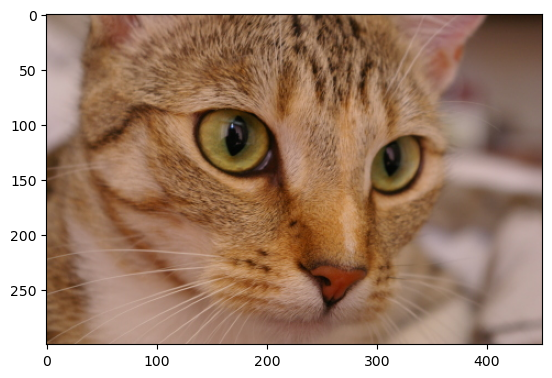

In [16]:
plt.imshow(skimage.data.chelsea())
plt.show()

And this is how the image is stored in the scikit-learn's image library:

In [18]:
skimage.data.chelsea()

array([[[143, 120, 104],
        [143, 120, 104],
        [141, 118, 102],
        ...,
        [ 45,  27,  13],
        [ 45,  27,  13],
        [ 45,  27,  13]],

       [[146, 123, 107],
        [145, 122, 106],
        [143, 120, 104],
        ...,
        [ 46,  29,  13],
        [ 45,  29,  13],
        [ 47,  30,  14]],

       [[148, 126, 112],
        [147, 125, 111],
        [146, 122, 109],
        ...,
        [ 48,  28,  17],
        [ 49,  29,  18],
        [ 50,  30,  19]],

       ...,

       [[ 92,  58,  30],
        [105,  71,  43],
        [132,  98,  71],
        ...,
        [172, 145, 138],
        [172, 145, 138],
        [172, 145, 138]],

       [[128,  92,  60],
        [139, 103,  71],
        [134,  95,  64],
        ...,
        [166, 142, 132],
        [166, 142, 132],
        [167, 143, 133]],

       [[139, 103,  71],
        [127,  88,  57],
        [125,  86,  53],
        ...,
        [161, 137, 127],
        [161, 137, 127],
        [162, 138, 128]]

The inner-most arrays correspond to actual pixel values (e.g. $[162, 138, 128]$ is the r,g,b values for the bottom right most pixel). Then, these are stored in another array that represents the row (e.g. $[[139, 103,  71],...[162, 138, 128]]$ are the pixels that correspond to the last row). Finally, these rows are stacked to create the picture.

The rest of the homework will be manipulating this image in various ways. The following function is given to you to use to show the picture

In [20]:
def show_image(image):
  if isinstance(image, np.ndarray):
    plt.imshow(image)
    plt.show()

## (10 pts) Question 4: Green-scale
Set the picture of Chelsea so that for each pixel, the red and blue values are set to 0, but the green values do not change

Implement this without using loops for full credit.

In [69]:
def green_scale(picture):
  # Replace "..." statement with your code
    picture[:, :, 0] = 0
    picture[:, :, 2] = 0
    return picture

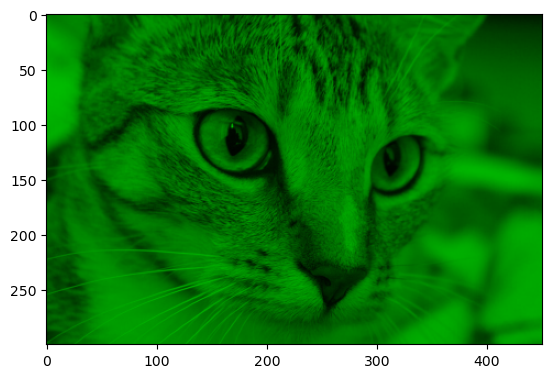

In [23]:
#test your code below
chelsea = copy.deepcopy(skimage.data.chelsea())
show_image(green_scale(chelsea))

## (10 pts) Question 5: Rows of RGB
For each row in the picture, change it to only have one of the RGB values be non-zero for each pixel.

Specifically, make the first row only have the red values, the second row only have blue values, the third row only have green values, the fourth back to only red and so on.

Implement this without using loops for full credit.

In [71]:
def rgb_scale(picture):
  # Replace "..." statement with your code
    
    r = np.arange(picture.shape[0]) % 3 == 0
    b = np.arange(picture.shape[0]) % 3 == 1
    g = np.arange(picture.shape[0]) % 3 == 2
    
    picture[r,:,1:] = 0
    picture[b,:,0] = 0
    picture[b,:,1] = 0
    picture[g,:,0] = 0
    picture[g,:,2] = 0
    
    return picture

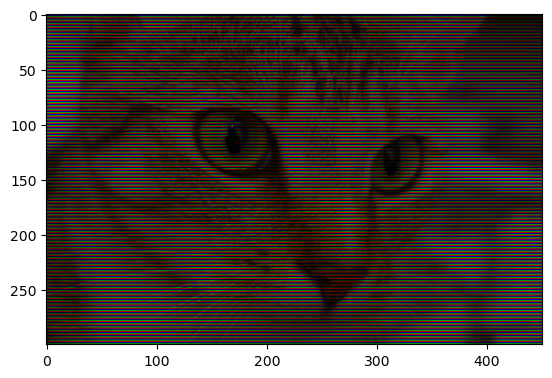

In [73]:
#test your code below
chelsea = copy.deepcopy(skimage.data.chelsea())
show_image(rgb_scale(chelsea))

## (10 pts) Question 6: Flip Vertical
Now, flip the original image of Chelsea upside down (top left becomes bottom left and top right becomes bottom right).

Implement this without using loops for full credit.

In [75]:
def flip_vert(picture):
  # Replace "..." statement with your code
    
    return picture[::-1]

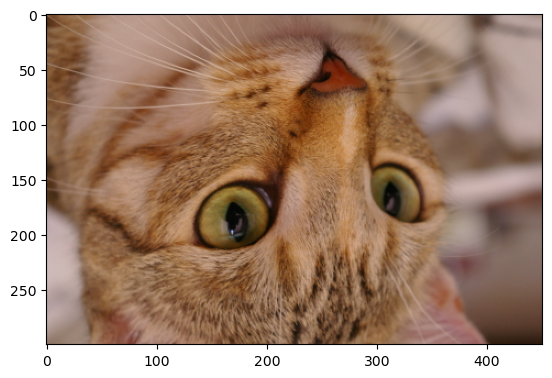

In [77]:
#test your code below
chelsea = copy.deepcopy(skimage.data.chelsea())
show_image(flip_vert(chelsea))

## (10 pts) Question 7: Flip Horizontal
Now, flip the original image of Chelsea horizontally (top left becomes top right).

Implement this without using loops for full credit.

In [79]:
def flip_horz(picture):
  # Replace "..." statement with your code
    
    return picture[:, ::-1]

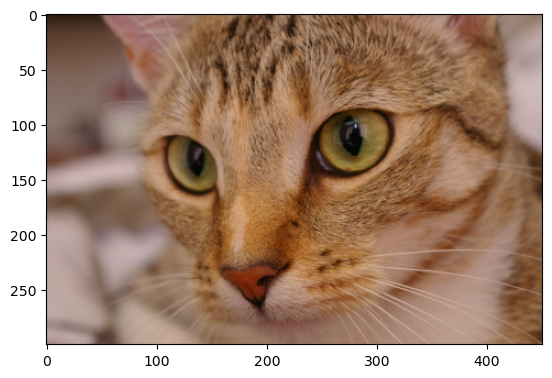

In [81]:
#test your code below
chelsea = copy.deepcopy(skimage.data.chelsea())
show_image(flip_horz(chelsea))

## (10 pts) Question 8: Cropping
Crop the picture of Chelsea to the rectangle defined by pixels 100 to 200 (101 total pixels) on the y-axis and pixels 100 to 350 on the x-axis

Implement this without using loops for full credit.

In [83]:
def crop_mid(picture):
  # Replace "..." statement with your code
    
  return picture[100:201, 100:351]

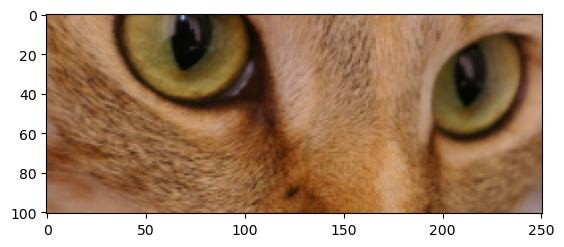

In [85]:
#test your code below
chelsea = copy.deepcopy(skimage.data.chelsea())
show_image(crop_mid(chelsea))

# Part 3 - Regression
In this part, you will learn to compute the closed form solutions for "Ordinary" Regression and Ridge regression from scratch.

Don't worry! You don't need any knowledge of Linear regression to answer these questions. What you learned from linear algebra bootcamp should be sufficient.

## Loading regression Data
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

We will be using the California Housing Data for the next 2 questions.

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


california_housing = fetch_california_housing( return_X_y=True, as_frame=True)
X = california_housing[0]
y = california_housing[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# np.random.seed(42)
sc=StandardScaler()
X_transform=sc.fit_transform(X_train)

## (15 points) Question 9 - Multiple Linear regression

In this question, you will write a function that will output the $\widehat{w}$ ($(p + 1) \times 1$)in the Ordinary Least Squares setting for a given $X$ matrix with dimensions $n \times p$ and $Y$ vector with dimensions $n \times 1$. Using this formula:

\begin{align*}
\widehat{w} =(X^TX)^{-1}X^TY
\end{align*}

Implement this without using loops for full credit.

**NOTE: The skeleton code adds an intercept vector (a vector of 1s) to $X$ for you**

In [90]:
#############################################################################
# [Question 6: 20 points]                                                   #
# TODO:                                                                     #
# Implement ordinary linear regression using the formula above. You should  #
# Input: X of shape (n, p), y of shape (n,)                                 #
# Output: w of shape ((p + 1), )                                            #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def OLS_solver(X, y):
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  # Replace "..." statement with your code
    
  XT_X = np.dot(new_X.T, new_X)
  XT_y = np.dot(new_X.T, y)
  w_hat = np.dot(np.linalg.inv(XT_X), XT_y)
    
  return w_hat

### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [93]:
w = OLS_solver(X_transform, y_train)
pred_y_test = np.hstack((np.ones((X_test.shape[0], 1)), sc.transform(X_test))) @ w
print("The test loss is {}".format(np.mean(np.square(y_test-pred_y_test))))
print("The weights are {}".format(w))

The test loss is 0.5305677824766754
The weights are [ 2.06923961e+00  8.49221760e-01  1.22119309e-01 -2.99558449e-01
  3.48409673e-01 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01
 -8.68616688e-01]


## (15 points) Question 10 - Ridge Regression
In Ridge Regression, we add this penalty term to the loss function $\lambda \sum_{j = 1}^p w_j^2 = \lambda w^Tw$ making the loss function for Ridge regression

\begin{align*}
L_{ridge}(w) = \frac{1}{2n}\sum_{i = 1}^n (y_i - x_i^Tw)^2 + \frac{1}{2} \lambda w^Tw
\end{align*}

Under this setting the closed form solution for $w$ is
\begin{align*}
\widehat{w}_{ridge} &= \left(X^TX + \lambda I_{p + 1}\right)^{-1}X^TY
\end{align*}

With the formula provided, write code to return $w$ ($(p +1) \times 1$) for a given $X$ matrix with dimensions $n \times p$, $Y$ vector with dimensions $n \times 1$, and $\lambda$

Implement this without using loops for full credit.

In [96]:
#############################################################################
# [Question 7: 20 points]                                                   #
# TODO:                                                                     #
# Implement Ridge regression using the formula above. You should use the    #
# formula provided                                                          #
# Input: X of shape (n, p), y of shape (n,), lmbda                          #
# Output: w of shape ((p + 1), )                                            #
# ONLY use numpy for this section! Use of scikit-learn will give you 0 points
#############################################################################

def ridge_solver(X, y, lmbda):
  n, p = X.shape
  ones = np.ones((n, 1))
  new_X = np.hstack((ones, X))
  # Replace "..." statement with your code

  I = np.eye(p + 1)
  I[0, 0] = 0

  XT_X = np.dot(new_X.T, new_X)
  XT_y = np.dot(new_X.T, y)
    
  w_ridge = np.dot(np.linalg.inv(XT_X + lmbda * I), XT_y)
    
  return w_ridge


### Test cases
<font color="#de3023"><h6><b>DO NOT MAKE EDITS TO THIS SECTION</b></h6></font>

In [99]:
w_ridge = ridge_solver(X_transform, y_train, 100)
pred_y_test = np.hstack((np.ones((X_test.shape[0], 1)), sc.transform(X_test))) @ w_ridge
print("The test loss is {}".format(np.mean(np.square(y_test-pred_y_test))))
print("The weights are {}".format(w_ridge))

The test loss is 0.5293421621695783
The weights are [ 2.06923961e+00  8.41636635e-01  1.30007490e-01 -2.75121580e-01
  3.18909358e-01  1.79674962e-03 -4.20259580e-02 -8.17054829e-01
 -7.90612134e-01]
